In [1]:
#Importamos las dependencias
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import numpy as np
import seaborn as sns


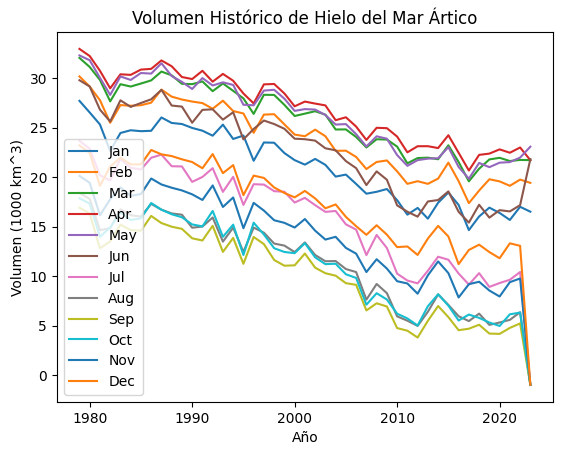

In [2]:
# Cargar los datos desde el archivo CSV
datos_piomas = pd.read_csv('CSV/DS_PIOMAS_Monthly_Current_Arctic_Sea_Ice_Volume.csv', delimiter=';')

# Extraer las columnas de año y mes
años = datos_piomas['year']
meses = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Graficar los datos para cada mes
for mes in meses:
    volumen = datos_piomas[mes]
    plt.plot(años, volumen, label=mes)

plt.xlabel('Año')
plt.ylabel('Volumen (1000 km^3)')
plt.title('Volumen Histórico de Hielo del Mar Ártico')
plt.legend()
plt.show()

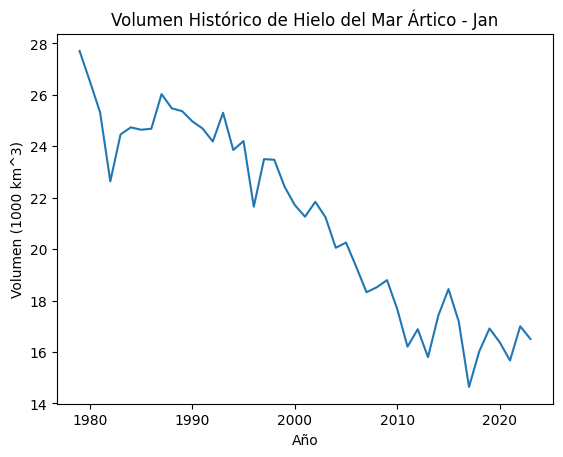

In [3]:
mes_seleccionado = 'Jan'  # Por ejemplo se ha seleccionado el mes de enero

# Obtener los datos de volumen para el mes de enero
volumen = datos_piomas[mes_seleccionado]

# Graficar el volumen histórico solo para el mes de enero
plt.plot(años, volumen)
plt.xlabel('Año')
plt.ylabel('Volumen (1000 km^3)')
plt.title(f'Volumen Histórico de Hielo del Mar Ártico - {mes_seleccionado}')
plt.show()

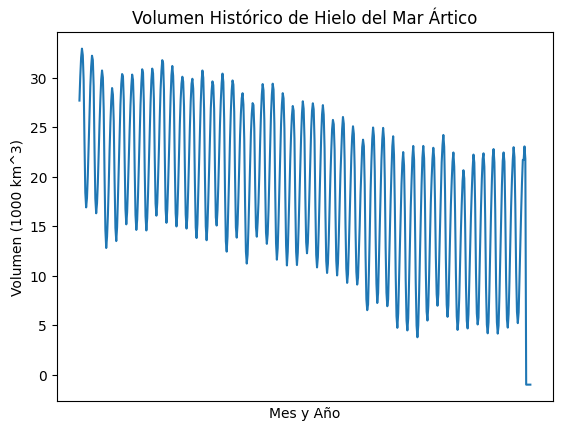

In [4]:
volumen = datos_piomas.iloc[:, 1:].values.flatten()
meses_totales = []
for año in años:
    for mes in meses:
        meses_totales.append(mes + ' ' + str(año))

plt.plot(meses_totales, volumen)
plt.xlabel('Mes y Año')
plt.ylabel('Volumen (1000 km^3)')
plt.title('Volumen Histórico de Hielo del Mar Ártico')
plt.xticks([])
plt.show()


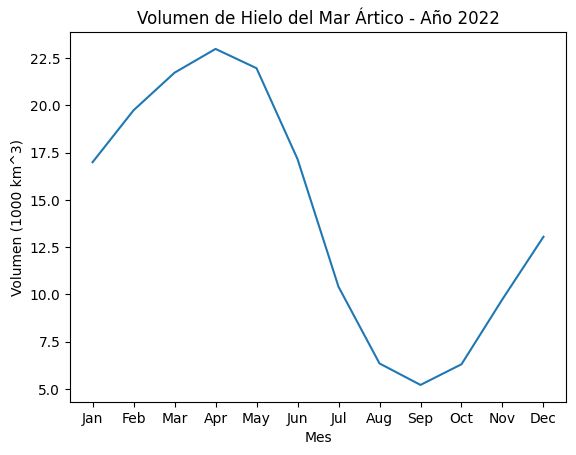

In [5]:
# Obtener el año seleccionado
año_seleccionado =2022 #<--------Escribimos un año entre 1979 y 2023 (Nuestro DS está comprendido entre esos años)

# Obtener los datos de volumen para el año seleccionado
volumen = datos_piomas.loc[datos_piomas['year'] == año_seleccionado].squeeze()[1:]

# Graficar el volumen de hielo por mes para el año seleccionado
plt.plot(meses, volumen)
plt.xlabel('Mes')
plt.ylabel('Volumen (1000 km^3)')
plt.title(f'Volumen de Hielo del Mar Ártico - Año {año_seleccionado}')
plt.show()

In [6]:

df_piomas = pd.DataFrame(datos_piomas, columns=['year','Jan','Feb','Mar','Apr','May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# # Mostrar las primeras 5 filas
print("Primeras 5 filas:")
print(df_piomas.head(5))

# # Mostrar las últimas 5 filas
print("Últimas 5 filas:")
print(df_piomas.tail(5))

Primeras 5 filas:
   year      Jan      Feb      Mar      Apr      May      Jun      Jul  \
0  1979  27.7036  30.1709  32.0455  32.9513  32.2945  29.7875  23.6610   
1  1980  26.5299  29.1541  31.1279  32.2346  31.8074  29.1523  22.8645   
2  1981  25.3175  27.7703  29.8183  30.7443  30.0339  26.8173  20.1727   
3  1982  22.6329  25.4864  27.6531  28.9682  28.3020  25.6161  19.6647   
4  1983  24.4571  27.2786  29.3852  30.3864  30.1703  27.7582  21.8543   

       Aug      Sep      Oct      Nov      Dec  
0  18.4091  16.9107  17.8535  20.1235  23.2010  
1  17.7900  16.3161  17.3245  19.4243  22.4513  
2  14.6351  12.8082  13.9650  16.1448  19.1146  
3  14.8344  13.5077  14.9113  17.7657  21.0663  
4  16.7381  15.1995  16.4269  18.9541  21.9620  
Últimas 5 filas:
    year      Jan      Feb      Mar      Apr      May      Jun       Jul  \
40  2019  16.9124  19.7808  21.7864  22.3728  21.0043  15.9050   8.90327   
41  2020  16.3782  19.5663  21.9476  22.8021  21.4572  16.6596   9.29499  

In [7]:
# Calcular el promedio por año
promedios_anuales = datos_piomas[meses].mean(axis=1)

# Calcular la desviación estándar por año
desviaciones_estandar_anuales = datos_piomas[meses].std(axis=1)

# Crear un nuevo DataFrame con los años y los promedios anuales
df_piomas_promedios_desviaciones = pd.DataFrame({'Año': años, 'Promedio Anual': promedios_anuales,'Desviación Estándar':desviaciones_estandar_anuales})

# Mostrar el DataFrame con los promedios anuales desviacion estandar
# # Mostrar las primeras 5 filas
print("Primeras 5 filas:")
print(df_piomas_promedios_desviaciones.head(5))

# # Mostrar las últimas 5 filas
print("Últimas 5 filas:")
print(df_piomas_promedios_desviaciones.tail(5))


Primeras 5 filas:
    Año  Promedio Anual  Desviación Estándar
0  1979       25.426008             6.102315
1  1980       24.681408             6.032519
2  1981       22.278500             6.861951
3  1982       21.700733             5.582073
4  1983       23.380892             5.641536
Últimas 5 filas:
     Año  Promedio Anual  Desviación Estándar
40  2019       13.515948             6.957116
41  2020       13.521779             7.104426
42  2021       13.809370             6.607483
43  2022       14.308164             6.618369
44  2023        9.852700            11.447676


In [8]:

x_piomas = sm.add_constant(df_piomas_promedios_desviaciones.index)  # Variable de tiempo
y_piomas = df_piomas_promedios_desviaciones['Promedio Anual']
modelo_piomas = sm.OLS(y_piomas, x_piomas)
resultados_piomas = modelo_piomas.fit()

# Imprimir los resultados del modelo
print(resultados_piomas.summary())


                            OLS Regression Results                            
Dep. Variable:         Promedio Anual   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     483.8
Date:                Mon, 26 Jun 2023   Prob (F-statistic):           5.06e-25
Time:                        04:36:19   Log-Likelihood:                -70.899
No. Observations:                  45   AIC:                             145.8
Df Residuals:                      43   BIC:                             149.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.4841      0.351     72.638      0.0

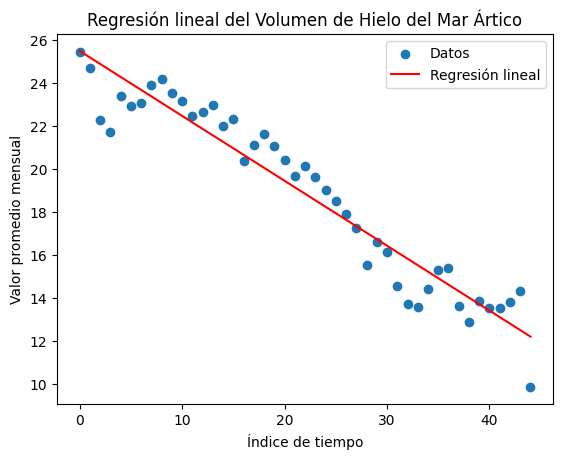

In [9]:
# Ajustar un modelo de regresión lineal
x_piomas = sm.add_constant(df_piomas_promedios_desviaciones.index)  # Variable de tiempo
y_piomas = df_piomas_promedios_desviaciones['Promedio Anual']
modelo = sm.OLS(y_piomas, x_piomas)
resultados = modelo.fit()
# Crear una figura y un eje
fig, ax = plt.subplots()

# Graficar los datos
ax.scatter(df_piomas_promedios_desviaciones.index, df_piomas_promedios_desviaciones['Promedio Anual'], label='Datos')

# Graficar la línea de regresión
ax.plot(df_piomas_promedios_desviaciones.index, resultados.predict(), color='red', label='Regresión lineal')

# Etiquetas y título
ax.set_xlabel('Índice de tiempo')
ax.set_ylabel('Valor promedio mensual')
ax.set_title('Regresión lineal del Volumen de Hielo del Mar Ártico')

# Leyenda
ax.legend()

# Mostrar la gráfica
plt.show()



In [10]:
datos_CD=pd.read_csv('CSV/DS_CarbonDioxide.csv', delimiter=';')
# Crear DataFrame con columnas seleccionadas
df_CD = pd.DataFrame(datos_CD, columns=['year', 'month', 'decimal_date', 'monthly_avg', 'de-seasonalized', 'days', 'st.dev_of_days', 'unc.of_mon_mean'])

In [11]:
# # Mostrar las primeras 5 filas
print("Primeras 5 filas:")
print(df_CD.head(5))

# # Mostrar las últimas 5 filas
print("Últimas 5 filas:")
print(df_CD.tail(5))

Primeras 5 filas:
   year  month  decimal_date  monthly_avg  de-seasonalized  days  \
0  1958      3     1958.2027       315.70              NaN    -1   
1  1958      4     1958.2877       317.45              NaN    -1   
2  1958      5     1958.3699       317.51              NaN    -1   
3  1958      6     1958.4548       317.24              NaN    -1   
4  1958      7     1958.5370       315.86              NaN    -1   

   st.dev_of_days  unc.of_mon_mean  
0           -9.99            -0.99  
1           -9.99            -0.99  
2           -9.99            -0.99  
3           -9.99            -0.99  
4           -9.99            -0.99  
Últimas 5 filas:
     year  month  decimal_date  monthly_avg  de-seasonalized  days  \
776  2022     11     2022.8750       417.51              NaN    25   
777  2022     12     2022.9583       418.95              NaN    24   
778  2023      1     2023.0417       419.47              NaN    31   
779  2023      2     2023.1250       420.41           

In [12]:
# Ajustar un modelo de regresión lineal
x_CD = sm.add_constant(datos_CD.index)  # Variable de tiempo
y_CD = datos_CD['monthly_avg']
modelo = sm.OLS(y_CD, x_CD)
resultados = modelo.fit()

# Imprimir los resultados del modelo
print(resultados.summary())

                            OLS Regression Results                            
Dep. Variable:            monthly_avg   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                 3.253e+04
Date:                Mon, 26 Jun 2023   Prob (F-statistic):               0.00
Time:                        04:36:19   Log-Likelihood:                -2318.0
No. Observations:                 781   AIC:                             4640.
Df Residuals:                     779   BIC:                             4649.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        305.3699      0.337    906.230      0.0

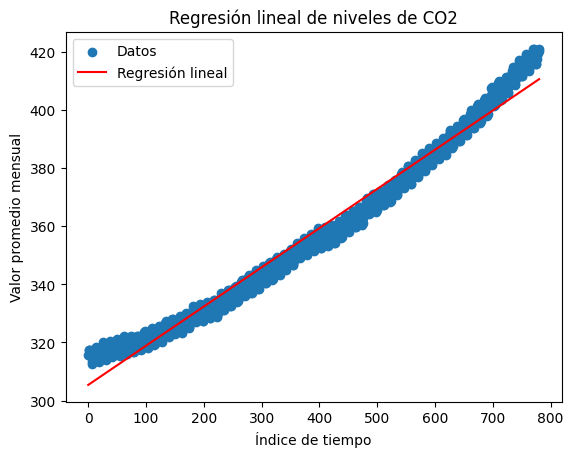

In [13]:
# Ajustar un modelo de regresión lineal
x_CD = sm.add_constant(df_CD.index)  # Variable de tiempo
y_CD = df_CD['monthly_avg']
modelo = sm.OLS(y_CD, x_CD)
resultados = modelo.fit()

# Crear una figura y un eje
fig, ax = plt.subplots()

# Graficar los datos
ax.scatter(df_CD.index, df_CD['monthly_avg'], label='Datos')

# Graficar la línea de regresión
ax.plot(df_CD.index, resultados.predict(), color='red', label='Regresión lineal')

# Etiquetas y título
ax.set_xlabel('Índice de tiempo')
ax.set_ylabel('Valor promedio mensual')
ax.set_title('Regresión lineal de niveles de CO2')

# Leyenda
ax.legend()

# Mostrar la gráfica
plt.show()

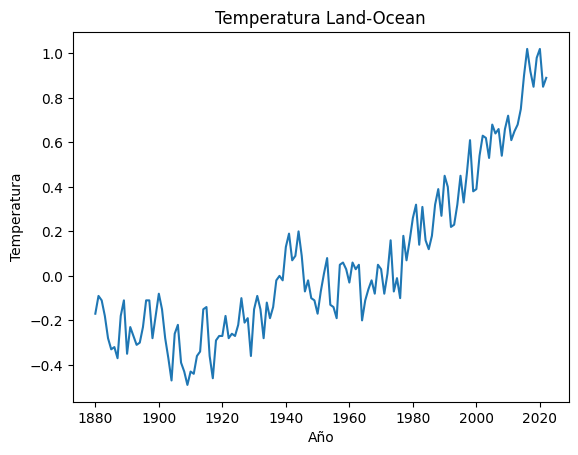

In [26]:
datos_L_O_T = pd.read_csv('CSV/DS_Land-Ocean_Temperature.csv', delimiter=';')

años_L_O_t = datos_L_O_T['YEAR']
temperaturas_L_O_T = datos_L_O_T['No_Smoothing']

plt.plot(años_L_O_t, temperaturas_L_O_T)
plt.title("Temperatura Land-Ocean")
plt.xlabel("Año")
plt.ylabel("Temperatura")
plt.show()

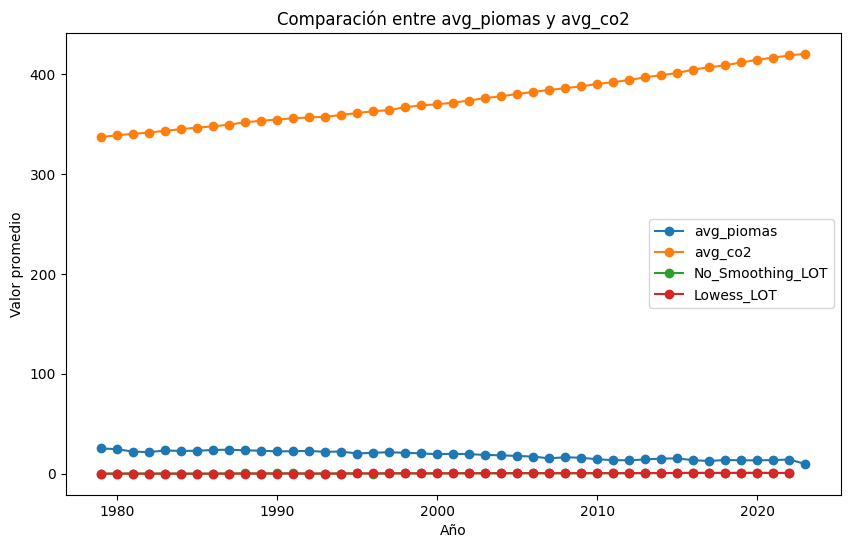

In [31]:
datos_M_R = pd.read_csv('CSV/DS_MIXED_RESUME.csv', delimiter=';')

# Crear el gráfico de línea
plt.figure(figsize=(10, 6))
plt.plot(datos_M_R['year'], datos_M_R['avg_piomas'], label='avg_piomas', marker='o')
plt.plot(datos_M_R['year'], datos_M_R['avg_co2'], label='avg_co2', marker='o')

# Agregar las líneas correspondientes a las variables "No_Smoothing_LOT" y "Lowess_LOT"
plt.plot(datos_M_R['year'], datos_M_R['No_Smoothing_LOT'], label='No_Smoothing_LOT', marker='o')
plt.plot(datos_M_R['year'], datos_M_R['Lowess_LOT'], label='Lowess_LOT', marker='o')

# Configurar el gráfico
plt.xlabel('Año')
plt.ylabel('Valor promedio')
plt.title('Comparación entre avg_piomas y avg_co2')
plt.legend()

# Mostrar el gráfico
plt.show()


Text(0.5, 1.0, 'Relación inversa entre CO2 y volumen de hielo del mar Ártico')

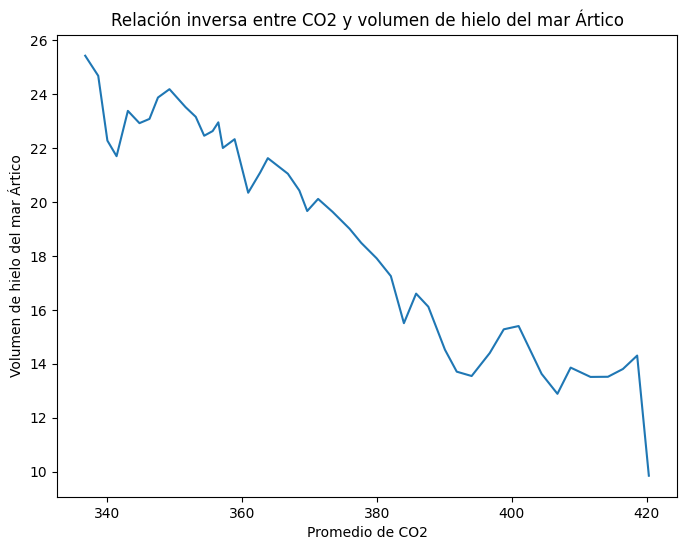

In [28]:

# Crear el gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.plot(datos_M_R['avg_co2'], datos_M_R['avg_piomas'])
plt.xlabel('Promedio de CO2')
plt.ylabel('Volumen de hielo del mar Ártico')
plt.title('Relación inversa entre CO2 y volumen de hielo del mar Ártico')

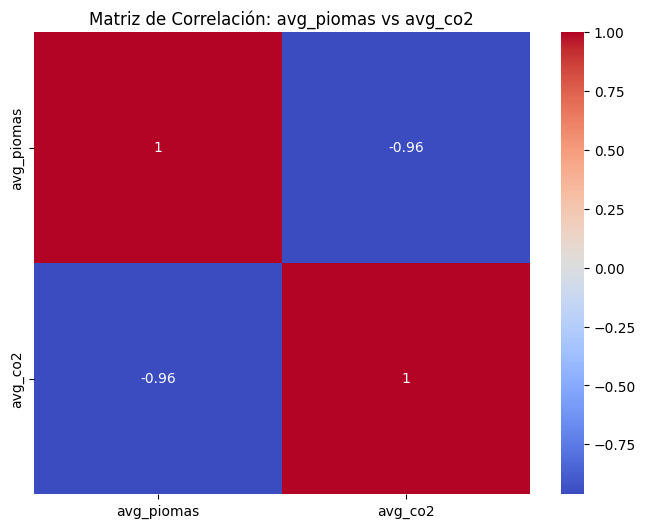

In [35]:

# Calcular la matriz de correlación
matrix_correlacion_piomas_co2 = datos_M_R[['avg_piomas', 'avg_co2']].corr()

# Crear el mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(matrix_correlacion_piomas_co2, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación: avg_piomas vs avg_co2')

# Mostrar el mapa de calor
plt.show()

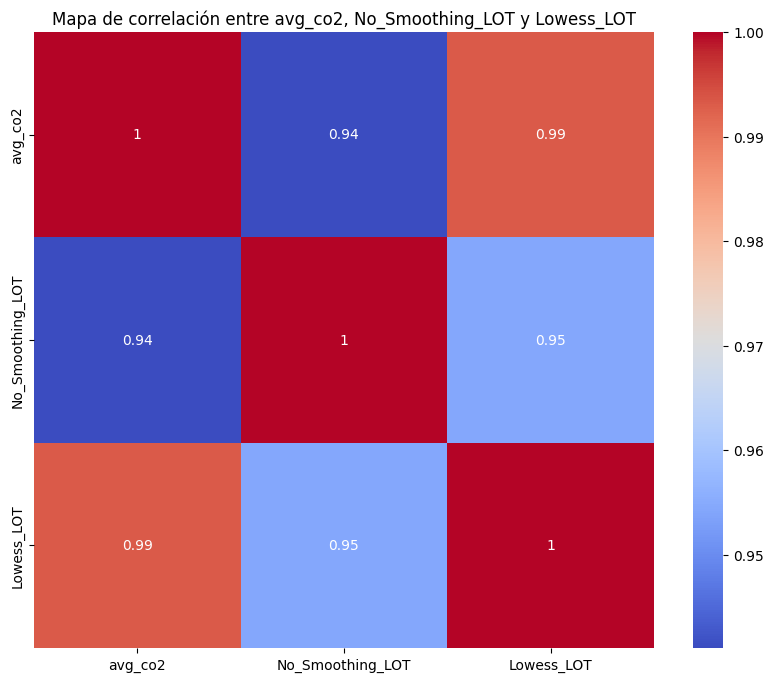

In [40]:
data_co2_LOT = datos_M_R[['avg_co2', 'No_Smoothing_LOT', 'Lowess_LOT']]

# Calcular la matriz de correlación
correlation_matrix = data_co2_LOT.corr()

# Crear el mapa de correlación utilizando Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Mapa de correlación entre avg_co2, No_Smoothing_LOT y Lowess_LOT')
plt.show()